In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression

In [129]:
df=pd.read_csv("../data/train.csv",sep=",")
df.head(5)
df.isna().sum()
#sns.heatmap(df.isna())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [67]:
df.shape

(891, 12)

In [123]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
#Data description:

#     Survival - Survival (0 = No; 1 = Yes). Not included in test.csv file.
#     Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
#     Name - Name
#     Sex - Sex
#     Age - Age
#     Sibsp - Number of Siblings/Spouses Aboard
#     Parch - Number of Parents/Children Aboard
#     Ticket - Ticket Number
#     Fare - Passenger Fare
#     Cabin - Cabin
#     Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
# #

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [120]:
 #One-Hot Encoding

df['Sex_fac']=pd.factorize(df['Sex'])[0]
Sex_dum=pd.get_dummies(df['Sex'], drop_first=True)
df.join(Sex_dum)

df['Embarked_fac']=pd.factorize(df['Embarked'])[0]
Emb_dum=pd.get_dummies(df['Embarked'], drop_first=True)
df=df.join(Emb_dum)

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_fac,Embarked_fac,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,1,0,0


In [1]:
 #df.isna().sum()

In [125]:
from sklearn.model_selection import train_test_split
X=df[['Pclass','Sex_fac','Age','SibSp','Parch','Fare','Embarked_fac','Q','S']]
y = df ['Survived']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=101)

In [126]:
#imputation  option 1
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
cols=X_train[['Pclass','Sex_fac','Age','SibSp','Parch','Fare','Embarked_fac','Q','S']] 
#question drop_first should we use Embarked_fac?
print(cols.isna().sum())
cols

Pclass            0
Sex_fac           0
Age             135
SibSp             0
Parch             0
Fare              0
Embarked_fac      0
Q                 0
S                 0
dtype: int64


,Pclass,Sex_fac,Age,SibSp,Parch,Fare,Embarked_fac,Q,S
733,2,0,23.0,0,0,13.0000,0,0,1
857,1,0,51.0,0,0,26.5500,0,0,1
81,3,0,29.0,0,0,9.5000,0,0,1
319,1,1,40.0,1,1,134.5000,1,0,0
720,2,1,6.0,0,1,33.0000,0,0,1
...,...,...,...,...,...,...,...,...,...
575,3,0,19.0,0,0,14.5000,0,0,1
838,3,0,32.0,0,0,56.4958,0,0,1
337,1,1,41.0,0,0,134.5000,1,0,0
523,1,1,44.0,0,1,57.9792,1,0,0


<AxesSubplot:>

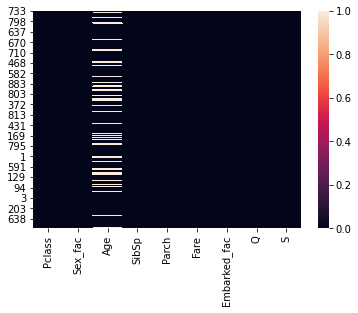

In [131]:
sns.heatmap(cols.isna())

In [107]:
 #One-Hot Encoding
# b={}
# for i in ['Pclass','Sex','Age','SibSp','Parch','Ticket','Fare','Embarked']:
#     a =pd.get_dummies(df[i],drop_first=True)
#     b.update({i : a}) 
    
# pd.DataFrame(b, index=[0])

# Sex_dummies=pd.get_dummies(df['Sex'], drop_first=True)
# df=df.join(Sex_dummies)
# Pclass_dummies
#df=df.join(pd.get_dummies(df.Sex, drop_first=True),lsuffix='_dummy')
#df = df.join(pd.get_dummies(df.color))


In [168]:
#imputation  option 1
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
cols=X_train[['Pclass','Sex_fac','Age','SibSp','Parch','Fare','Embarked_fac','Q','S']] 


imputer.fit(cols)
t = imputer.transform(cols)
t.shape

type(t)
X_train_im_mf=pd.DataFrame(t,columns=cols.columns)
X_train_im_mf['Age'].mean()


colst=X_test[['Pclass','Sex_fac','Age','SibSp','Parch','Fare','Embarked_fac','Q','S']] 
tt= imputer.transform(colst)
X_test_mf=pd.DataFrame(tt,columns=colst.columns)


In [202]:
#imputation  option 2

from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(random_state=101)
cols=X_train[['Pclass','Sex_fac','Age','SibSp','Parch','Fare','Embarked_fac','Q','S']] 
imputer.fit(cols)
t = imputer.transform(cols)
t.shape
type(t)
X_train_im_it=pd.DataFrame(t,columns=cols.columns)
X_train_im_it['Age'].mean()
tt= imputer.transform(colst)
X_test_it=pd.DataFrame(tt,columns=colst.columns)


In [171]:
# use LogisticRegression and most frequence strategy imputerd data to predict
# should do feature scaler  for example mini-max or StandardScaler
from sklearn.linear_model import LogisticRegression
m=LogisticRegression(max_iter=1000,random_state=101)
m.fit(X_train_im_mf,y_train)
m.coef_
m.intercept_
print(f'LR-score-X_train-with-most-frequence-imputed-data is {m.score(X_train_im_mf, y_train)}')
print(f'LR-score-X_test-with-most-frequence-data is {m.score(X_test_mf, y_test)}')


LR-score-X_train-with-most-frequence-imputed-data is 0.8033707865168539
LR-score-X_test-with-most-frequence-data is 0.8100558659217877


In [175]:
# use LogisticRegression and most frequence strategy imputerd data to predict
# should do feature scaler  for example mini-max or StandardScaler
from sklearn.linear_model import LogisticRegression
m=LogisticRegression(max_iter=1000,random_state=101)
m.fit(X_train_im_it,y_train)
m.coef_
m.intercept_
X_test
print(f'LR-score-X_train-with-iterative-imputed-data is {m.score(X_train_im_it, y_train)}')
print(f'LR-score-X_test-with-iterative-imputed-data is {m.score(X_test_it, y_test)}')


LR-score-X_train-with-iterative-imputed-data is 0.8160112359550562
LR-score-X_test-with-iterative-imputed-data is 0.8156424581005587


In [215]:
#Use random_forest to predict 
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators= 100,max_depth=5,random_state=101)
rf_mf=rf.fit(X_train_im_mf,y_train)
print(f'RF-score-X_train-with-most-frequence-imputed-data is {rf_mf.score(X_train_im_mf, y_train)}')
print(f'RF-score-X_test-with-most-frequence-data is {rf_mf.score(X_test_mf, y_test)}')

RF-score-X_train-with-most-frequence-imputed-data is 0.8567415730337079
RF-score-X_test-with-most-frequence-data is 0.8268156424581006


In [214]:
rf=RandomForestClassifier(n_estimators= 100,max_depth=5,random_state=101)
rf_it=rf.fit(X_train_im_it,y_train)
print(f'LR-score-X_train-with-iterative-imputed-data is {rf_it.score(X_train_im_it, y_train)}')
print(f'LR-score-X_test-with-iterative-imputed-data is {rf_it.score(X_test_it, y_test)}')

LR-score-X_train-with-iterative-imputed-data is 0.8595505617977528
LR-score-X_test-with-iterative-imputed-data is 0.8324022346368715


In [229]:
#Kaggle home/baodong/spiced_projects/unsupervised-lemon-encounter-notes/week_02/data
kg=pd.read_csv('~/spiced_projects/unsupervised-lemon-encounter-notes/week_02/data/test.csv')


kg['Sex_fac']=pd.factorize(kg['Sex'])[0]
Sex_dum=pd.get_dummies(kg['Sex'], drop_first=True)
kg.join(Sex_dum)

kg['Embarked_fac']=pd.factorize(kg['Embarked'])[0]
Emb_dum=pd.get_dummies(kg['Embarked'], drop_first=True)
kg=kg.join(Emb_dum,)

kg



imputer = IterativeImputer(random_state=101)
cols=X_train[['Pclass','Sex_fac','Age','SibSp','Parch','Fare','Embarked_fac','Q','S']] 
imputer.fit(cols)
kgcols=kg[['Pclass','Sex_fac','Age','SibSp','Parch','Fare','Embarked_fac','Q','S']] 
kg = imputer.transform(kgcols)

X_kg=pd.DataFrame(kg,columns=kgcols.columns)
X_kg
y_pred=rf_it.predict(X_kg)
y_pred_pd=pd.DataFrame(y_pred,index=X_kg.index,columns={'Survived'})

y_pred_pd.to_csv('./titanickaggle.csv',index=True)
y_pred_pd

,Survived
0,0
1,0
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [ ]:
 # kaggle note:8755 Baodong Zhang		0.78468 